# **Testes do Naive Bayes**

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedKFold
import numpy as np 
import pylab 
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [30]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all_seasons_pre_processing.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BaseReduzida1.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BaseReduzida2.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BaseReduzida3.csv')

In [ ]:
df1.head()

In [ ]:
df2.head()


In [ ]:
df3.head()

In [ ]:
df4.head()

In [32]:
X1 = df1.iloc[:,:-1].values
y1 = df1.iloc[:,-1].values

X2 = df2.iloc[:,:-1].values
y2 = df2.iloc[:,-1].values

X3 = df3.iloc[:,:-1].values
y3 = df3.iloc[:,-1].values

X4 = df4.iloc[:,:-1].values
y4 = df4.iloc[:,-1].values

In [ ]:
#getting individual arrays from the columns to test normal hypothesis and correlation for X1
X1_pid = X1[:,0]
X1_gp = X1[:,1]
X1_pts = X1[:,2]
X1_reb = X1[:,3]
X1_ast = X1[:,4]
X1_net_rating = X1[:,5]
X1_oreb_pct = X1[:,6]
X1_dreb_pct = X1[:,7]
X1_usg_pct = X1[:,8]
X1_ts_pct = X1[:,9]
X1_ast_pct = X1[:,10]
X1_season = X1[:,11]

In [ ]:
#getting individual arrays from the columns to test normal hypothesis and correlation for X2
X2_pid = X2[:,0]
X2_gp = X2[:,1]
X2_pts = X2[:,2]
X2_reb = X2[:,3]
X2_ast = X2[:,4]
X2_net_rating = X2[:,5]
X2_oreb_pct = X2[:,6]
X2_dreb_pct = X2[:,7]
X2_usg_pct = X2[:,8]
X2_ts_pct = X2[:,9]
X2_ast_pct = X2[:,10]
X2_season = X2[:,11]

In [ ]:
#getting individual arrays from the columns to test normal hypothesis and correlation for X3
X3_pts = X3[:,0]
X3_reb = X3[:,1]
X3_ast = X3[:,2]
X3_net_rating = X3[:,3]
X3_usg_pct = X3[:,4]
X3_ast_pct = X3[:,5]

In [ ]:
#getting individual arrays from the columns to test normal hypothesis and correlation for X4
X4_pts = X4[:,0]
X4_reb = X4[:,1]
X4_ast = X4[:,2]
X4_net_rating = X4[:,3]
X4_ast_pct = X4[:,4]
X4_usg_pct = X4[:,5]

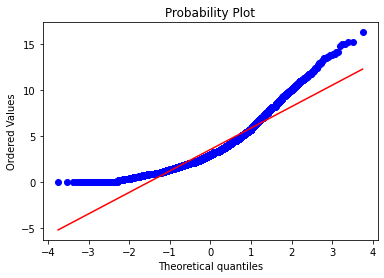

In [ ]:
#Plotting the Q-QPlot according to each array Xn_<nameAttrib> manually
vfunc = (np.log)
stats.probplot( X3_reb, dist="norm" , plot=plt)
pylab.show()


In [ ]:
corr_mat = df4.corr(method = 'pearson')
print(corr_mat)
#corr_mat.to_csv( '/content/drive/MyDrive/Colab Notebooks/corrMatDB4.csv', index=False )

In [33]:
accMean  = [0, 0, 0, 0]
stdMean  = np.float64(0)
accB1_10 = np.empty(10, dtype=object)
accB4_10 = np.empty(10, dtype=object)
it = 10
for i in range(0, it, 1):
  rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=i)

  for train, test in rkf.split(X1, y1):
    X_train1 = X1[train]
    X_test1 = X1[test]
    y_train1 = y1[train]
    y_test1 = y1[test]

  for train, test in rkf.split(X2, y2):
    X_train2 = X2[train]
    X_test2 = X2[test]
    y_train2 = y2[train]
    y_test2 = y2[test]

  for train, test in rkf.split(X3, y3):
    X_train3 = X3[train]
    X_test3 = X3[test]
    y_train3 = y3[train]
    y_test3 = y3[test]

  for train, test in rkf.split(X4, y4):
    X_train4 = X4[train]
    X_test4 = X4[test]
    y_train4 = y4[train]
    y_test4 = y4[test]

  nb = GaussianNB()

  nb.fit(X_train1, y_train1)
  y_pred1 = nb.predict(X_test1)

  nb.fit(X_train2, y_train2)
  y_pred2 = nb.predict(X_test2)

  nb.fit(X_train3, y_train3)
  y_pred3 = nb.predict(X_test3)

  nb.fit(X_train4, y_train4)
  y_pred4 = nb.predict(X_test4)

  print('\n\n\n-------------SEED DE NÚMERO ' + str(i) + ' -------------')

  acc = accuracy_score(y_test1, y_pred1)
  accMean[0] += acc
  accB1_10[i] = acc
  
  print("Acurácia B1:", acc)

  cm = confusion_matrix(y_test1, y_pred1)
  print("Matriz de confusão B1: ")
  print(cm)

  acc = accuracy_score(y_test2, y_pred2)
  accMean[1] += acc
  
  print("Acurácia B2:", acc)

  cm = confusion_matrix(y_test2, y_pred2)
  print("Matriz de confusão B2: ")
  print(cm)

  acc = accuracy_score(y_test3, y_pred3)
  accMean[2] += acc
  

  print("Acurácia B3:", acc)

  cm = confusion_matrix(y_test3, y_pred3)
  print("Matriz de confusão B3: ")
  print(cm)

  nb_m = nb.score(X_train3, y_train3)
  print("Score NB B3: ", nb_m)

  acc = accuracy_score(y_test4, y_pred4)
  accMean[3] += acc
  accB4_10[i] = acc
 
  print("Acurácia B4:", acc)

  cm = confusion_matrix(y_test4, y_pred4)
  print("Matriz de confusão B4: ")
  print(cm)

  nb_m = nb.score(X_train4, y_train4)
  stdMean = stdMean + np.std(y_pred4)
  print("Score NB B4: ", nb_m)
  print("Standard Deviation B4: ", np.std(y_pred4))

for i in range(0, 4, 1):
  accMean[i] = accMean[i] / it

print(accMean)
print( (accMean[0] + accMean[1] + accMean[2] + accMean[3]) / 4 )
print(stdMean/3)
print("10 acc base 1:", accB1_10)
print("10 acc base 4:", accB4_10)




-------------SEED DE NÚMERO 0 -------------
Acurácia B1: 0.9721723518850988
Matriz de confusão B1: 
[[1082   30]
 [   1    1]]
Acurácia B2: 0.9807692307692307
Matriz de confusão B2: 
[[765  15]
 [  0   0]]
Acurácia B3: 0.9730769230769231
Matriz de confusão B3: 
[[758  21]
 [  0   1]]
Score NB B3:  0.7874946588805014
Acurácia B4: 0.9923076923076923
Matriz de confusão B4: 
[[773   6]
 [  0   1]]
Score NB B4:  0.9923087879219484
Standard Deviation B4:  0.09430705093129738



-------------SEED DE NÚMERO 1 -------------
Acurácia B1: 0.9775583482944344
Matriz de confusão B1: 
[[1088   25]
 [   0    1]]
Acurácia B2: 0.9807692307692307
Matriz de confusão B2: 
[[763  15]
 [  0   2]]
Acurácia B3: 0.9794871794871794
Matriz de confusão B3: 
[[763  16]
 [  0   1]]
Score NB B3:  0.7712576556046147
Acurácia B4: 0.9910256410256411
Matriz de confusão B4: 
[[773   6]
 [  1   0]]
Score NB B4:  0.9928785073351375
Standard Deviation B4:  0.0873678207046196



-------------SEED DE NÚMERO 2 -------------


# **Plotando gráficos dos métodos não-supervisionados**

# **12. k-MEANS**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [ ]:
db = []
si = []
dp_db = []
dp_si = []
mean_db = []
mean_si = []

In [ ]:
for x in range(2, 21):
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all_seasons_pre_processing.csv')
  df = df.drop('was_mvp', axis=1)

  km = KMeans(n_clusters=x, init='k-means++', max_iter = 300, n_init=5, random_state = 0)
  km.fit(df)
  predict = km.fit_predict(df)
  centroids = km.cluster_centers_

  df["Cluster"] = km.labels_
  labels = df["Cluster"]

  db.append(davies_bouldin_score(df, labels))
  si.append(silhouette_score(df, labels))
  dp_db.append(np.std(db))
  dp_si.append(np.std(si))
  mean_db.append(np.mean(davies_bouldin_score(df, labels)))
  mean_si.append(np.mean(silhouette_score(df, labels)))


In [ ]:
k_means = [db, si, dp_db, dp_si, mean_db, mean_si]

In [ ]:
print(k_means)

[[0.500677060354062, 0.5096348806776979, 0.5134773410705106, 0.531496987569788, 0.5355760821337144, 0.5424387607374069, 0.5512869236507786, 0.5723842549587991, 0.5856093788500542, 0.5945567488982121, 0.6122187006877642, 0.6312778473934646, 0.6424252166360283, 0.6546885874043039, 0.6720843189528113, 0.6856431271641682, 0.7049493772780531, 0.7172006283154517, 0.7395140283991966, 0.500677060354062, 0.5096348806776979, 0.5134773410705106, 0.531496987569788, 0.5355760821337144, 0.5424387607374069, 0.5512869236507786, 0.5723842549587991, 0.5856093788500542, 0.5945567488982121, 0.6122187006877642, 0.6312778473934646, 0.6424252166360283, 0.6546885874043039, 0.6720843189528113, 0.6856431271641682, 0.7049493772780531, 0.7172006283154517, 0.7395140283991966], [0.6266815471364442, 0.5851547696511393, 0.5645419762910631, 0.539246754909167, 0.5312074318697858, 0.5215396372059196, 0.5132007203710692, 0.4957268647494867, 0.486204994872483, 0.480793153691667, 0.470209085116004, 0.4575059510435769, 0.45

In [ ]:
#Gerando gráficos
import matplotlib.pyplot as plt

x = [x for x in range(2,21)]

graph_db  = k_means[0][0:19]
graph_sil = k_means[1][0:19]


plt.xticks(range(1,21))
plt.grid(True, which='major', axis='y')
plt.plot(x, graph_db)

0.07370386


In [ ]:
plt.xticks(range(1,21))
plt.grid(True, which='major', axis='y')
plt.plot(x, graph_sil)

In [ ]:
print(k_means[4])

[0.500677060354062, 0.5096348806776979, 0.5134773410705106, 0.531496987569788, 0.5355760821337144, 0.5424387607374069, 0.5512869236507786, 0.5723842549587991, 0.5856093788500542, 0.5945567488982121, 0.6122187006877642, 0.6312778473934646, 0.6424252166360283, 0.6546885874043039, 0.6720843189528113, 0.6856431271641682, 0.7049493772780531, 0.7172006283154517, 0.7395140283991966, 0.500677060354062, 0.5096348806776979, 0.5134773410705106, 0.531496987569788, 0.5355760821337144, 0.5424387607374069, 0.5512869236507786, 0.5723842549587991, 0.5856093788500542, 0.5945567488982121, 0.6122187006877642, 0.6312778473934646, 0.6424252166360283, 0.6546885874043039, 0.6720843189528113, 0.6856431271641682, 0.7049493772780531, 0.7172006283154517, 0.7395140283991966]


# **13. HIERÁRQUICO AGLOMERATIVO**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [ ]:
db = []
si = []
dp_db = []
dp_si = []
mean_db = []
mean_si = []

In [ ]:
for x in range(2, 21):
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all_seasons_pre_processing.csv')
  df = df.drop('was_mvp', axis=1)

  ahc = AgglomerativeClustering(n_clusters=x, affinity='euclidean', linkage='complete')
  ahc.fit(df)
  ahc.fit_predict(df)

  df["Cluster"] = ahc.labels_
  labels = df["Cluster"]

  db.append(davies_bouldin_score(df, labels))
  si.append(silhouette_score(df, labels))
  dp_db.append(np.std(davies_bouldin_score(df, labels)))
  dp_si.append(np.std(silhouette_score(df, labels)))
  mean_db.append(np.mean(davies_bouldin_score(df, labels)))
  mean_si.append(np.mean(silhouette_score(df, labels)))

In [ ]:
aglomerative = [db, si, dp_db, dp_si, mean_db, mean_si]

In [ ]:
print(aglomerative)

[[0.5006768688432589, 0.5094854202913034, 0.5189099940648586, 0.5403680013834244, 0.5475044939039189, 0.5513715648960146, 0.5641373372973887, 0.5731139092541927, 0.540123030987208, 0.5142688604098352, 0.5378752425525694, 0.5578092957187313, 0.5731142891599573, 0.5828337057063842, 0.5658145864523132, 0.6242797052932993, 0.6413973967447048, 0.6867515914100577, 0.7002614875787653], [0.626549872465282, 0.5298998434509639, 0.5425899775142866, 0.49049173235392085, 0.46458573613701065, 0.4824682696326485, 0.4684299173850125, 0.47681462872011826, 0.47564181042234066, 0.47555409727398923, 0.446321849031763, 0.4410086111783164, 0.4332247483492806, 0.4357888669323669, 0.4354108725949094, 0.42946314267793506, 0.4106932900189419, 0.38845583810488904, 0.3825504768223273], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.5006768688432589, 0.50948542029130

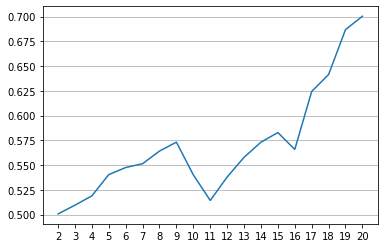

In [ ]:
#Gerando gráficos
import matplotlib.pyplot as plt

x = [x for x in range(2,21)]

graph_db  = aglomerative[0][0:19]
graph_sil = aglomerative[1][0:19]

plt.xticks(range(1,21))
plt.grid(True, which='major', axis='y')
plt.plot(x, graph_db)

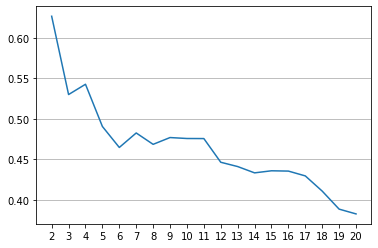

In [ ]:
plt.xticks(range(1,21))
plt.grid(True, which='major', axis='y')
plt.plot(x, graph_sil)

# **14. EXPECTATION MAXIMIZATION (EM)**



In [ ]:
from sklearn.mixture import GaussianMixture #EM
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [ ]:
db = []
si = []
dp_db = []
dp_si = []
mean_db = []
mean_si = []

In [ ]:
for x in range(2, 21):
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all_seasons_pre_processing.csv')
  df = df.drop('was_mvp', axis=1)

  gmm = GaussianMixture(n_components=x, n_init=5, covariance_type='full')
  gmm.fit(df)

  df["Cluster"] = gmm.predict(df)
  labels = df["Cluster"]

  db.append(davies_bouldin_score(df, labels))
  si.append(silhouette_score(df, labels))
  dp_db.append(np.std(davies_bouldin_score(df, labels)))
  dp_si.append(np.std(silhouette_score(df, labels)))
  mean_db.append(np.mean(davies_bouldin_score(df, labels)))
  mean_si.append(np.mean(silhouette_score(df, labels)))

In [ ]:
em = [db, si, dp_db, dp_si, mean_db, mean_si]

In [ ]:
print(em)

[[24.007107894482203, 40.489905223105715, 45.1593611595199, 43.73124855769981, 50.84998366110494, 101.74676187992603, 73.7008670322233, 109.35608097630308, 60.37174215402715, 59.11294727779555, 84.92591987701833, 67.82530031337377, 47.02970055637518, 53.30211247576537, 56.694585935941085, 55.60612145221049, 57.35229276137154, 49.70430470983732, 74.31491931122419], [-0.0010827284377981122, -0.008410939293541784, -0.011357517344496172, -0.017447379780872328, -0.026926276396750166, -0.043250836368813945, -0.028240344089136067, -0.04620382814214254, -0.05455362596726541, -0.05045958059784047, -0.040444344700206594, -0.24252140285438717, -0.08786171851782479, -0.4104810202701448, -0.2822136472791484, -0.4328119292090014, -0.42427982867968195, -0.30021036375747084, -0.4634004554643792], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [24.0071078944

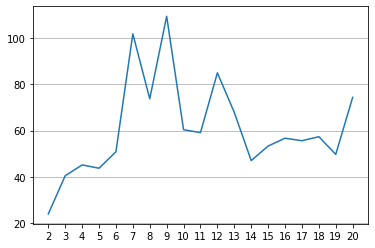

In [ ]:
#Gerando gráficos
import matplotlib.pyplot as plt

x = [x for x in range(2,21)]

graph_db  = em[0][0:19]
graph_sil = em[1][0:19]

plt.xticks(range(1,21))
plt.grid(True, which='major', axis='y')
plt.plot(x, graph_db)

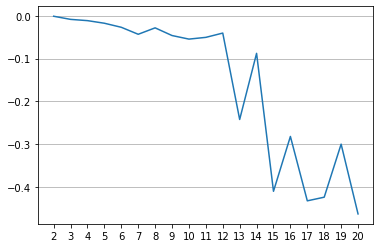

In [ ]:
plt.xticks(range(1,21))
plt.grid(True, which='major', axis='y')
plt.plot(x, graph_sil)

# **15. Rodar K-NN, AD e RNA 10 vezes para testes estatisticos**

K-NN

In [40]:
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

import numpy as np 
import pylab 
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

df1 = pd.read_csv('all_seasons_pre_processing.csv')


X1 = df1.iloc[:,:-1].values
y1 = df1.iloc[:,-1].values

#X2 = df2.iloc[:,:-1].values
#y2 = df2.iloc[:,-1].values

#X3 = df3.iloc[:,:-1].values
#y3 = df3.iloc[:,-1].values

#X4 = df4.iloc[:,:-1].values
#y4 = df4.iloc[:,-1].values

In [42]:
accKNN10 = np.empty(10, dtype=object)
it = 10
for i in range(0, it, 1):
  rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=i)

  for train, test in rkf.split(X1, y1):
      X_train11 = X1[train]
      X_test11 = X1[test]
      y_train11 = y1[train]
      y_test11 = y1[test]

  #for train, test in rkf.split(X2, y2):
      #X_train2 = X2[train]
      #X_test2 = X2[test]
     # y_train2 = y2[train]
     # y_test2 = y2[test]

  #for train, test in rkf.split(X3, y3):
#     X_train3 = X3[train]
#      X_test3 = X3[test]
#      y_train3 = y3[train]
#      y_test3 = y3[test]

#  for train, test in rkf.split(X4, y4):
#      X_train4 = X4[train]
#      X_test4 = X4[test]
#      y_train4 = y4[train]
 #     y_test4 = y4[test]

  knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean', weights='distance')

  knn.fit(X_train11, y_train11)
  y_pred11 = knn.predict(X_test11)

 # knn.fit(X_train2, y_train2)
 # y_pred2 = knn.predict(X_test2)

  #knn.fit(X_train3, y_train3)
 # y_pred3 = knn.predict(X_test3)

 # knn.fit(X_train4, y_train4)
  #y_pred4 = knn.predict(X_test4)

  acc = accuracy_score(y_test11, y_pred11)
  accKNN10[i] = acc
  print("Acurácia: ", acc)

  #prec = str(precision_score(y_test1, y_pred1, average= 'macro'))
  #print("Precisão: ", prec)

  #dp = np.std(y_pred1)
  #print("Desvio-padrão: ", dp)

  #rec = str(recall_score(y_test1, y_pred1, average = 'macro'))
  #print("Recall: ", rec)

  #f1 = str(f1_score(y_test1, y_pred1, average = 'macro'))
  #print("F1 Score: ", f1)

  cm = confusion_matrix(y_test11, y_pred11)
  print("Matriz de confusão")
  print(cm)

print("array de acc:", accKNN10)

Acurácia:  0.9964093357271095
Matriz de confusão
[[1110    2]
 [   2    0]]
Acurácia:  0.9946140035906643
Matriz de confusão
[[1108    5]
 [   1    0]]
Acurácia:  0.9946140035906643
Matriz de confusão
[[1107    2]
 [   4    1]]
Acurácia:  0.9946140035906643
Matriz de confusão
[[1106    2]
 [   4    2]]
Acurácia:  0.9982046678635548
Matriz de confusão
[[1112    0]
 [   2    0]]
Acurácia:  0.9982046678635548
Matriz de confusão
[[1111    2]
 [   0    1]]
Acurácia:  0.9973070017953322
Matriz de confusão
[[1111    1]
 [   2    0]]
Acurácia:  0.992818671454219
Matriz de confusão
[[1106    4]
 [   4    0]]
Acurácia:  0.9982046678635548
Matriz de confusão
[[1112    0]
 [   2    0]]
Acurácia:  0.9946140035906643
Matriz de confusão
[[1108    2]
 [   4    0]]
array de acc: [0.9964093357271095 0.9946140035906643 0.9946140035906643
 0.9946140035906643 0.9982046678635548 0.9982046678635548
 0.9973070017953322 0.992818671454219 0.9982046678635548
 0.9946140035906643]


AD

In [43]:
from sklearn.tree import DecisionTreeClassifier

import numpy as np 
import pylab 
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

df1 = pd.read_csv('all_seasons_pre_processing.csv')

X1 = df1.iloc[:,:-1].values
y1 = df1.iloc[:,-1].values


In [44]:
it = 10
accAd = np.empty(10, dtype=object)
for i in range(0, it, 1):
  
  rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=i)
  for train, test in rkf.split(X1, y1):
    X_train10 = X1[train]
    X_test10 = X1[test]
    y_train10 = y1[train]
    y_test10 = y1[test]

  ad = DecisionTreeClassifier(max_depth = 10, min_samples_split=10, min_samples_leaf=10)
  
  if(i == 0):
    n_nodes = []
    err = []

  ad.fit(X_train10, y_train10)
  y_pred10 = ad.predict(X_test10)
  n_nodes.append(ad.tree_.node_count)

  acc = (accuracy_score(y_test10, y_pred10))
  accAd[i] = acc
  print("Acurácia:", acc)

  cm = confusion_matrix(y_test10, y_pred10)
  print("Matriz de confusão: ")
  print(cm)

print("lista de acc:", accAd)

Acurácia: 0.9964093357271095
Matriz de confusão: 
[[1110    2]
 [   2    0]]
Acurácia: 0.9982046678635548
Matriz de confusão: 
[[1112    1]
 [   1    0]]
Acurácia: 0.9973070017953322
Matriz de confusão: 
[[1109    0]
 [   3    2]]
Acurácia: 0.9946140035906643
Matriz de confusão: 
[[1108    0]
 [   6    0]]
Acurácia: 0.9973070017953322
Matriz de confusão: 
[[1111    1]
 [   2    0]]
Acurácia: 0.9982046678635548
Matriz de confusão: 
[[1112    1]
 [   1    0]]
Acurácia: 0.9982046678635548
Matriz de confusão: 
[[1112    0]
 [   2    0]]
Acurácia: 0.9964093357271095
Matriz de confusão: 
[[1109    1]
 [   3    1]]
Acurácia: 0.9991023339317774
Matriz de confusão: 
[[1112    0]
 [   1    1]]
Acurácia: 0.9973070017953322
Matriz de confusão: 
[[1108    2]
 [   1    3]]
lista de acc: [0.9964093357271095 0.9982046678635548 0.9973070017953322
 0.9946140035906643 0.9973070017953322 0.9982046678635548
 0.9982046678635548 0.9964093357271095 0.9991023339317774
 0.9973070017953322]
